# Master Thesis

# Import all the relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC
from sklearn.utils import resample
from pandas.plotting import table 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# Import German Credit Dataset

In [2]:
file = "C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Master/Thesis/Datasets/GC/german.data"

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'pre_employmentsince', 'installmentrate', 'status_sex', 'otherdebtors',
         'pre_residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# Data Exploration

## Glimpse on dataset

In [3]:
germany = pd.read_csv(file,names = names, delimiter=' ')
print(germany.shape)
print (germany.columns)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'pre_employmentsince', 'installmentrate',
       'status_sex', 'otherdebtors', 'pre_residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


In [4]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   pre_employmentsince    1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   status_sex             1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  pre_residencesince     1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

- Observations: 1000 rows and 15 features, object (string) and integer, no null values


In [5]:
germany.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Modify classification column into the binary: 2 -> 1= bad , 1 -> 0 = good

In [6]:
germany.classification.replace([1,2], [0,1], inplace=True)

# Data Transformation

## One Hot Encoding - Categorical Features

In [7]:
categorical_variables = names = ['existingchecking', 'credithistory', 'purpose',
         'savings','pre_employmentsince', 'status_sex', 'otherdebtors',
         'property', 'otherinstallmentplans', 'housing',
         'job', 'telephone', 'foreignworker']

In [8]:
d = defaultdict(LabelEncoder)

In [9]:
labelencode = germany[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

for x in range(len(categorical_variables)):
    print(categorical_variables[x], ": ", germany[categorical_variables[x]].unique())
    print(categorical_variables[x], ": ", labelencode[categorical_variables[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
pre_employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
pre_employmentsince :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Create dummy for all the cateogircal variables 

In [10]:
dummycatevar = pd.get_dummies(germany[categorical_variables])

## Concatenate the transformed dataset

In [11]:
numerical_variables = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [12]:
transform_data_clean = pd.concat([germany[numerical_variables], dummycatevar], axis = 1)
print(transform_data_clean.shape)

(1000, 62)


# EDA

Text(0, 0.5, 'Count')

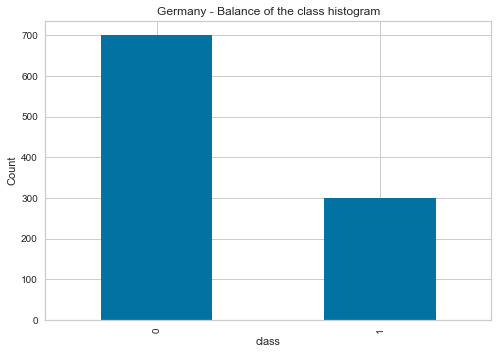

In [13]:
pd.value_counts(transform_data_clean['classification']).plot.bar()
plt.title('Germany - Balance of the class histogram')
plt.xlabel('class')
plt.ylabel('Count')

## Box Plots

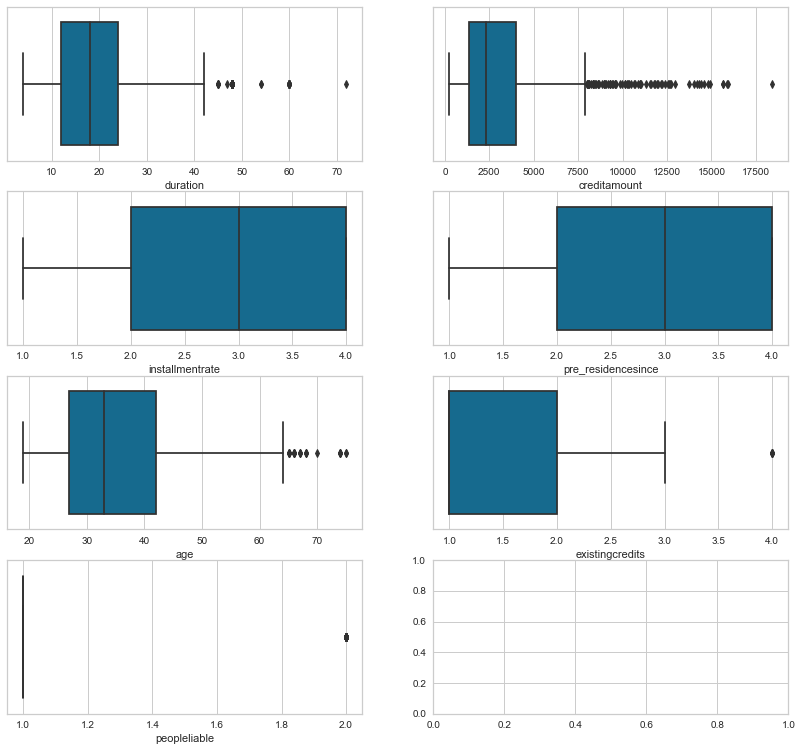

In [15]:
f, axes = plt.subplots(4,2 , figsize=(14, 13))
sns.boxplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.boxplot( transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.boxplot( transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.boxplot( transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.boxplot( transform_data_clean["age"] , ax=axes[2, 0])
sns.boxplot( transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.boxplot( transform_data_clean["peopleliable"] , ax=axes[3, 0])

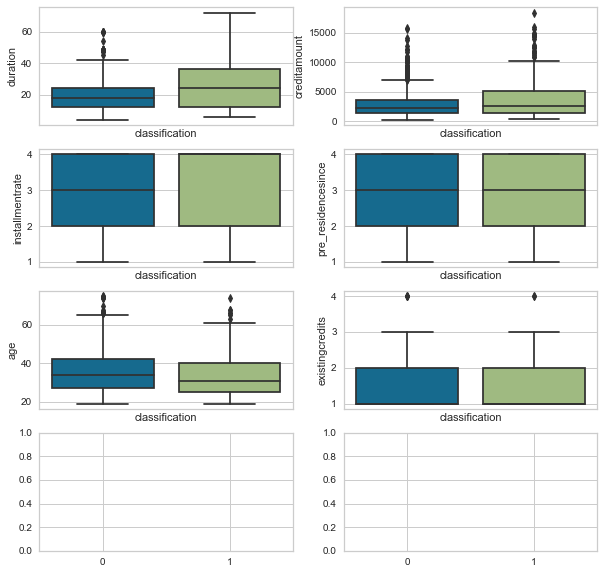

In [105]:
f, axes = plt.subplots(4,2 , figsize=(10, 10), sharex=True)
sns.boxplot( x='classification', y='duration', data=transform_data_clean ,ax=axes[0, 0])
sns.boxplot( x="classification", y='creditamount', data=transform_data_clean ,ax=axes[0, 1])
sns.boxplot( x="classification", y='installmentrate', data=transform_data_clean , ax=axes[1, 0])
sns.boxplot( x="classification", y='pre_residencesince', data=transform_data_clean , ax=axes[1, 1])
sns.boxplot( x="classification", y='age', data=transform_data_clean , ax=axes[2, 0])
sns.boxplot( x="classification", y='existingcredits', data=transform_data_clean ,  ax=axes[2, 1])  
sns.boxplot( x="classification", y='peop', data=transform_data_clean ,  ax=axes[2, 1])      

## Count plots

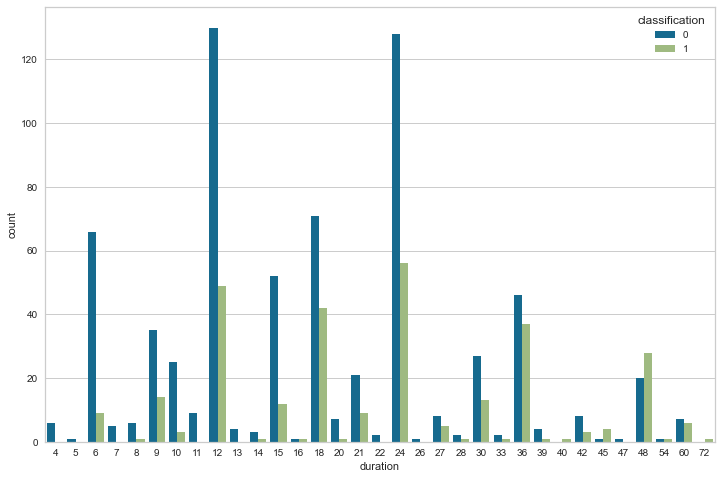

In [17]:
plt.figure(figsize=(12,8))
sns.countplot('duration', hue='classification', data=transform_data_clean)
plt.show()

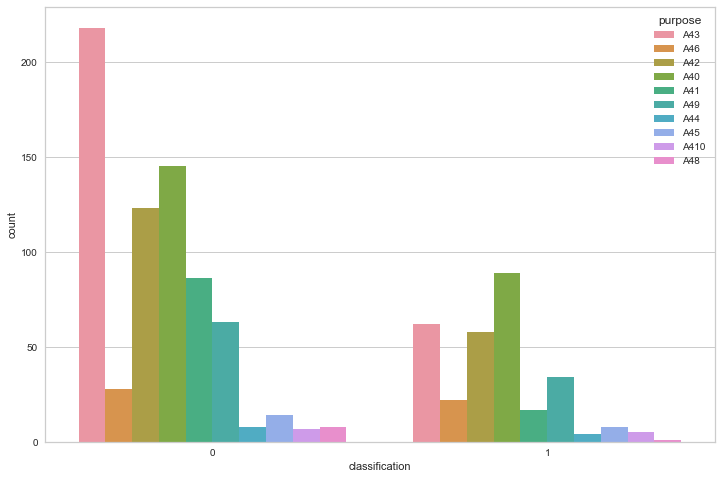

In [18]:
plt.figure(figsize=(12,8))
sns.countplot('classification', hue='purpose', data=germany)
plt.show()

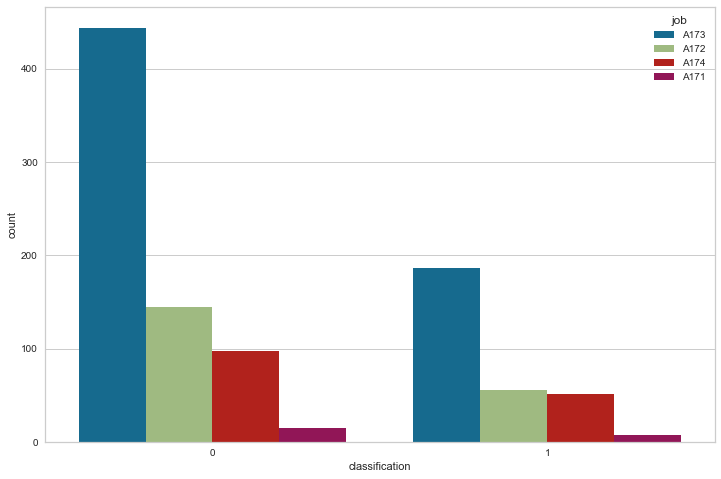

In [19]:
plt.figure(figsize=(12,8))
sns.countplot('classification', hue='job', data=germany)
plt.show()

## Skewness & Distribution Plots

In [82]:
from scipy.stats import skew
skew(transform_data_clean[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 1.09254221,  1.94670202, -0.53055076, -0.27216079,  1.01920752,
        1.27066631,  1.90657936])

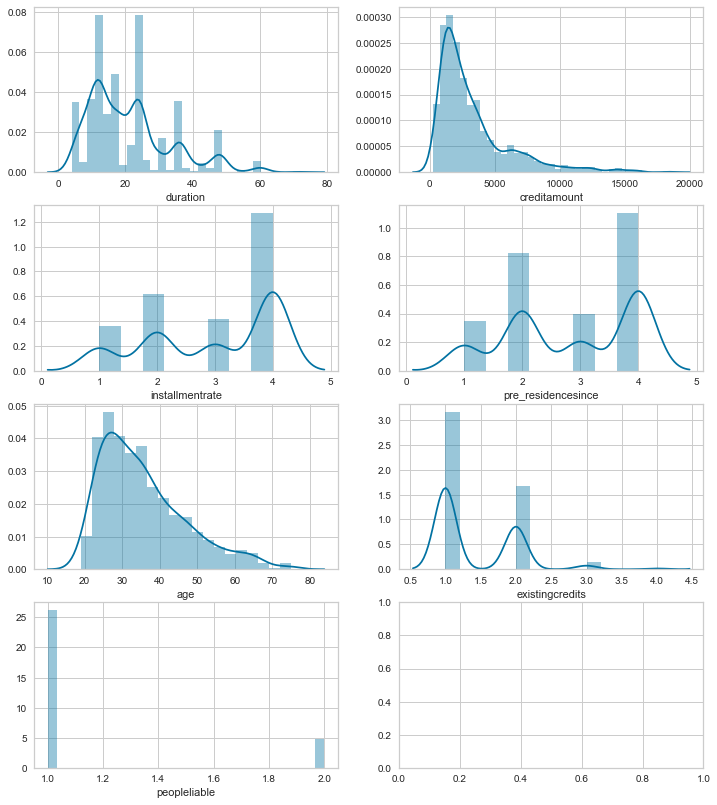

In [87]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.distplot( transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.distplot( transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.distplot( transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( transform_data_clean["age"] , ax=axes[2, 0])
sns.distplot( transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( transform_data_clean["peopleliable"] , ax=axes[3, 0])

## Normalization

In [20]:
column_max = transform_data_clean.max()
norm_df = transform_data_clean / column_max

## Split training and test data - Train_Test_Split Approach

In [21]:
X_classification = transform_data_clean.drop('classification', axis = 1)
y_classification = transform_data_clean['classification']

X_train, X_test, y_train, y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)

## Normalization: Each column's maximum value is divided to each value

In [22]:
column_max_X_train = X_train.max()
X_train_norm = X_train / column_max_X_train
column_max_X_test = X_test.max()
X_test_norm = X_test / column_max_X_test

In [23]:
from IPython.display import display, Markdown, Latex
display(Markdown("# Classification - Machine Learning Algorithm"))
def model_fit_vis(
    model,
    X_train,
    y_train,
    title_algorithm,
    algorithm_name,
    dataset=None):
    
    display(Markdown(f'## {title_algorithm}'))
    
    model.fit(X_train_norm,y_train)
    y_pred = model.predict(X_test_norm)    
    
    display(Markdown("## Confusion Matrix"))
    
    cfm = np.array(confusion_matrix(y_test, y_pred))
    print(cfm)
    sns.heatmap(cfm, cmap="Blues", annot=True)
    plt.title(f'Confusion Matrix: {algorithm_name}-{dataset if dataset else "Original Dataset"}')
    plt.xlabel("Predicted class")
    plt.ylabel("Actual class")
    plt.savefig(f'cfm_{algorithm_name}_or.png')
    plt.show()
    
    tn,fp,fn,tp = cfm.flatten()
    display(Markdown(f'''
    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: {tp}, False negative (Type II): {fn}, False positive (Type I): {fp}, True Negative: {tn}
    '''))
    
    
    display(Markdown(f"## {algorithm_name} prediction probability"))
    acc = accuracy_score(y_test,y_pred)
    print("accuracy_score : ",acc)
    
    display(Markdown(f"## {algorithm_name} Classification Report"))
    classes = [0,1]
    visualizer = ClassificationReport(model, classes=classes, support=True,cmap='Blues')
    visualizer.fit(X_train_norm, y_train)
    visualizer.score(X_test_norm, y_test)
    visualizer.show()
    
    return algorithm_name,tn,fp,fn,tp,acc

# Classification - Machine Learning Algorithm

In [24]:
results = []

## LogisticRegression(LR)

## Confusion Matrix

[[118  20]
 [ 28  34]]


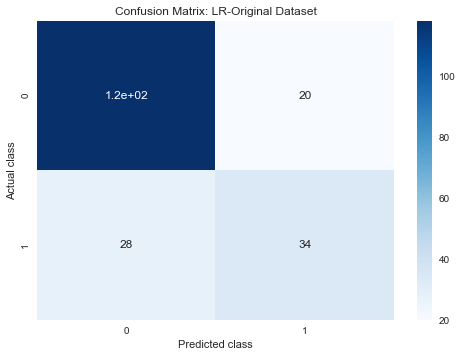


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 34, False negative (Type II): 28, False positive (Type I): 20, True Negative: 118
    

## LR prediction probability

accuracy_score :  0.76


## LR Classification Report

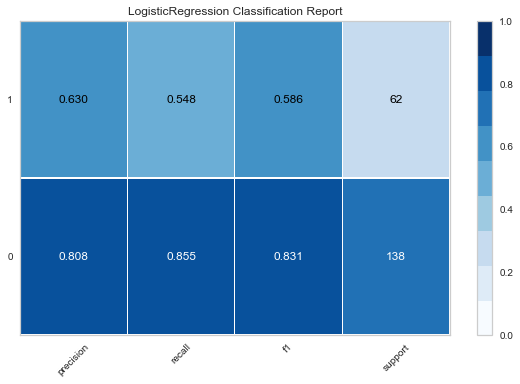

In [25]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
results += [ 
    model_fit_vis(lr, X_train_norm, y_train, title_algorithm='LogisticRegression(LR)', algorithm_name='LR')
]

## SVG (linear kernel function)

## Confusion Matrix

[[116  22]
 [ 25  37]]


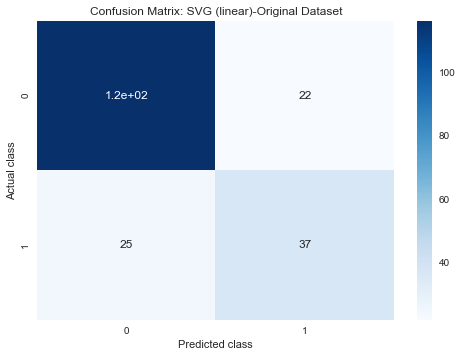


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 37, False negative (Type II): 25, False positive (Type I): 22, True Negative: 116
    

## SVG (linear) prediction probability

accuracy_score :  0.765


## SVG (linear) Classification Report

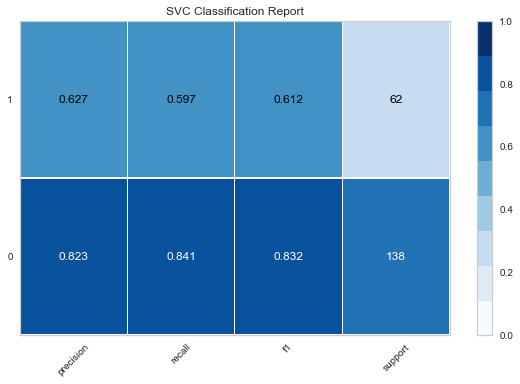

In [26]:
svm_clf_lin = SVC(kernel='linear')
results += [
    model_fit_vis(svm_clf_lin,X_train_norm,y_train,title_algorithm='SVG (linear kernel function)',algorithm_name="SVG (linear)")
]

## SVG (Radial basis function kernel)

## Confusion Matrix

[[125  13]
 [ 37  25]]


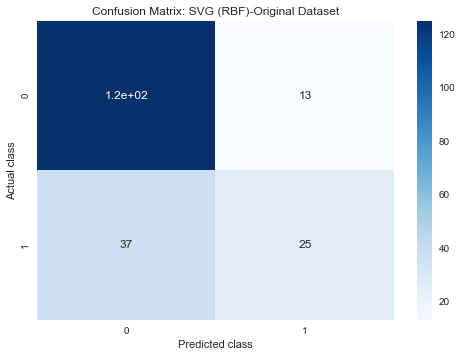


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 25, False negative (Type II): 37, False positive (Type I): 13, True Negative: 125
    

## SVG (RBF) prediction probability

accuracy_score :  0.75


## SVG (RBF) Classification Report

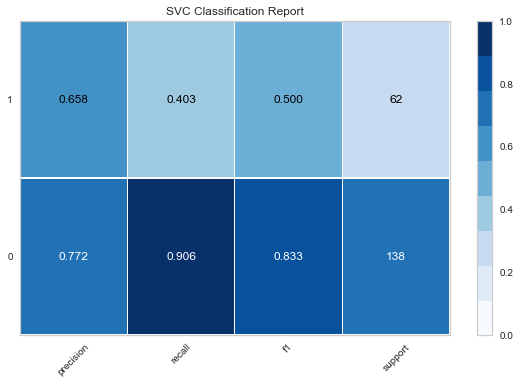

In [27]:
svm_clf_rbf = SVC(kernel='rbf', probability=True)
results += [
    model_fit_vis(svm_clf_rbf,X_train_norm,y_train,title_algorithm='SVG (Radial basis function kernel)',algorithm_name="SVG (RBF)")
]

## K-nearest neighbor (K=5)

## Confusion Matrix

[[124  14]
 [ 41  21]]


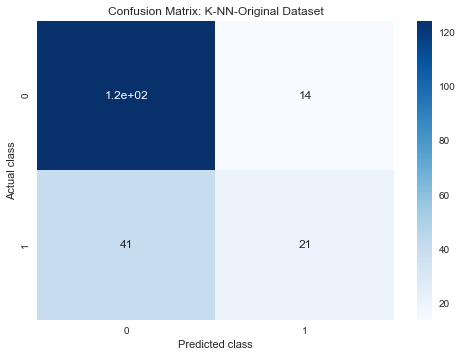


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 21, False negative (Type II): 41, False positive (Type I): 14, True Negative: 124
    

## K-NN prediction probability

accuracy_score :  0.725


## K-NN Classification Report

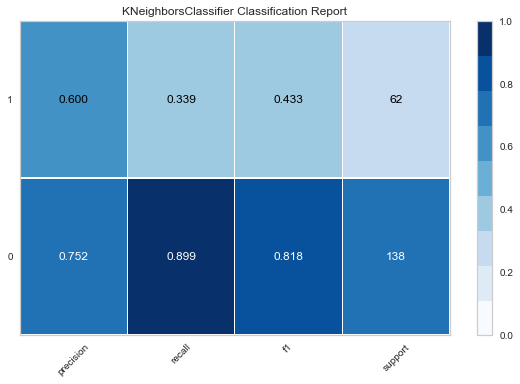

In [28]:
knn = KNeighborsClassifier()
results +=[
    model_fit_vis(knn,X_train_norm,y_train,title_algorithm='K-nearest neighbor (K=5)',algorithm_name="K-NN")
]

## Naive Bayes classifier

## Confusion Matrix

[[101  37]
 [ 17  45]]


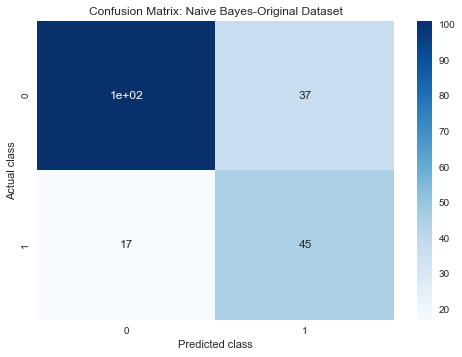


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 45, False negative (Type II): 17, False positive (Type I): 37, True Negative: 101
    

## Naive Bayes prediction probability

accuracy_score :  0.73


## Naive Bayes Classification Report

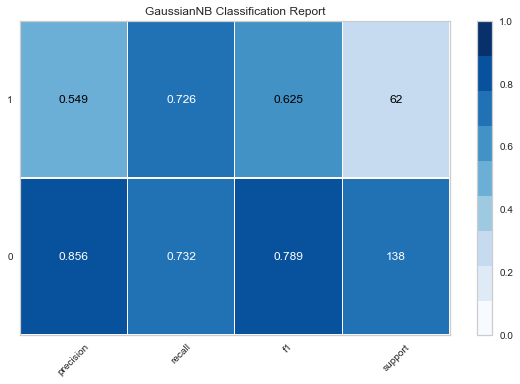

In [29]:
naive = GaussianNB()
results+=[
    model_fit_vis(naive,X_train_norm,y_train,title_algorithm='Naive Bayes classifier',algorithm_name="Naive Bayes")
]

In [30]:
df = pd.DataFrame(np.array(results),columns=['algorithm',"True Negative","False Positive","False Negative","True Positive","Accuracy"])
df

,algorithm,True Negative,False Positive,False Negative,True Positive,Accuracy
0,LR,118,20,28,34,0.76
1,SVG (linear),116,22,25,37,0.765
2,SVG (RBF),125,13,37,25,0.75
3,K-NN,124,14,41,21,0.725
4,Naive Bayes,101,37,17,45,0.73


In [31]:
results

[('LR', 118, 20, 28, 34, 0.76),
 ('SVG (linear)', 116, 22, 25, 37, 0.765),
 ('SVG (RBF)', 125, 13, 37, 25, 0.75),
 ('K-NN', 124, 14, 41, 21, 0.725),
 ('Naive Bayes', 101, 37, 17, 45, 0.73)]

## Cross Validation (=10) for LR & SVM

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [33]:
cv_lr = cross_val_score(lr, X_classification, y_classification, cv=kf)
cv_lr_mean = cv_lr.mean()
cv_lr_std = cv_lr.std()
print(cv_lr_mean)
print(cv_lr_std)

0.74
0.04538722287164087


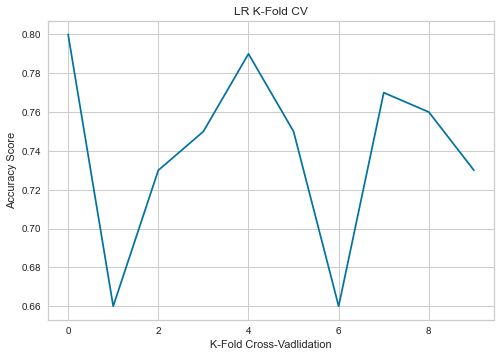

In [34]:
plt.xlabel('K-Fold Cross-Vadlidation')
plt.ylabel('Accuracy Score')
plt.title('LR K-Fold CV')
plt.plot(cv_lr)
plt.show()

## Bootstrap - Making New Dataset

In [107]:
column_names=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'classification', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202']

### Bootstrap 100 iterations

In [108]:
%%time
# values = transform_data_clean.values
values = transform_data_clean.values

n_iterations = 100

lr_data = []
lr_models = []
bootstrap_datas = []
bootstrap_mean = []
svm_data = []
svm_models = []

n_size = int(len(transform_data_clean))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size)
    
    bootstrap_df = pd.DataFrame(bootstrap, columns=column_names)
    bootstrap_max = bootstrap_df.max()
    bootstrap_norm_df = bootstrap_df / bootstrap_max
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())
 
    X1 = bootstrap_norm_df.drop('classification', axis = 1)
    y1 = bootstrap_norm_df['classification']
    # Logistic Regression
    lr_model = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model.fit(X1,y1)
    lr_pred = lr_model.predict(X_test_norm)
    
    lr_accu = accuracy_score(y_test, lr_pred)
    lr_cfm = confusion_matrix(y_test, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr_model)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X1,y1)
    svm_pred = svm_clf.predict(X_test_norm)
    svm_accu = accuracy_score(y_test, svm_pred)
    svm_cfm = confusion_matrix(y_test, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)

Wall time: 9.7 s


In [109]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

### Bootstrap 100: Mean & Standard Deviation

In [110]:
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.334300,0.193533,0.736500,0.699250,0.476440,0.356000,0.57400,0.31600,0.299000,0.260000,...,0.741000,0.084000,0.023000,0.211000,0.632000,0.134000,0.64000,0.36000,0.962000,0.038000
1,0.289611,0.174002,0.748000,0.702750,0.476013,0.348000,0.57350,0.29800,0.261000,0.268000,...,0.722000,0.093000,0.019000,0.202000,0.632000,0.147000,0.61600,0.38400,0.963000,0.037000
2,0.282444,0.169063,0.752000,0.715250,0.469147,0.358750,0.58000,0.30400,0.300000,0.271000,...,0.708000,0.100000,0.019000,0.208000,0.643000,0.130000,0.61800,0.38200,0.965000,0.035000
3,0.277111,0.167632,0.731500,0.703250,0.469293,0.351250,0.57900,0.29100,0.268000,0.279000,...,0.725000,0.086000,0.021000,0.235000,0.615000,0.129000,0.60800,0.39200,0.969000,0.031000
4,0.292056,0.177231,0.754750,0.723750,0.481547,0.343500,0.58250,0.29600,0.282000,0.282000,...,0.731000,0.108000,0.023000,0.180000,0.644000,0.153000,0.57100,0.42900,0.959000,0.041000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.350883,0.183356,0.730000,0.717000,0.480973,0.353500,0.57750,0.30700,0.266000,0.271000,...,0.701000,0.104000,0.026000,0.219000,0.611000,0.144000,0.59800,0.40200,0.964000,0.036000
98,0.283750,0.205857,0.747250,0.712250,0.476213,0.357750,0.57700,0.28600,0.276000,0.249000,...,0.707000,0.112000,0.023000,0.199000,0.622000,0.156000,0.57400,0.42600,0.964000,0.036000
99,0.347583,0.214945,0.734500,0.711000,0.474760,0.353750,0.58350,0.30200,0.279000,0.267000,...,0.717000,0.105000,0.033000,0.203000,0.612000,0.152000,0.59900,0.40100,0.960000,0.040000
100,0.308496,0.186507,0.742172,0.710065,0.473563,0.351038,0.57716,0.30049,0.273620,0.268560,...,0.713150,0.107970,0.021830,0.200640,0.629570,0.147960,0.59761,0.40239,0.962960,0.037040


### Botstrap 100: Confidence Interval

In [111]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

Duration:Lower Boundary : 0.2570196100022254
Duration:Upper Boundary : 0.3599721677755521
Duration:95% Confidence Interval : [0.2570196100022254, 0.3599721677755521]
Credit Amount:Lower Boundary : 0.1598972161791846
Credit Amount:Upper Boundary : 0.21311711562693833
Credit Amount:95% Confidence Interval : [0.1598972161791846, 0.21311711562693833]
installmentrate:Lower Boundary : 0.7235068779136968
installmentrate:Upper Boundary : 0.760838122086303
installmentrate:95% Confidence Interval : [0.7235068779136968, 0.760838122086303]
installmentrate:Lower Boundary : 0.6949935930211134
installmentrate:Upper Boundary : 0.7251364069788867
installmentrate:95% Confidence Interval : [0.6949935930211134, 0.7251364069788867]
age:Lower Boundary : 0.4631234433130395
age:Upper Boundary : 0.48400323416443874
age:95% Confidence Interval : [0.4631234433130395, 0.48400323416443874]
existingcredits:Lower Boundary : 0.34191914894237463
existingcredits:Upper Boundary : 0.3601558510576257
existingcredits:95% C

### Bootstrap 100: Histogram

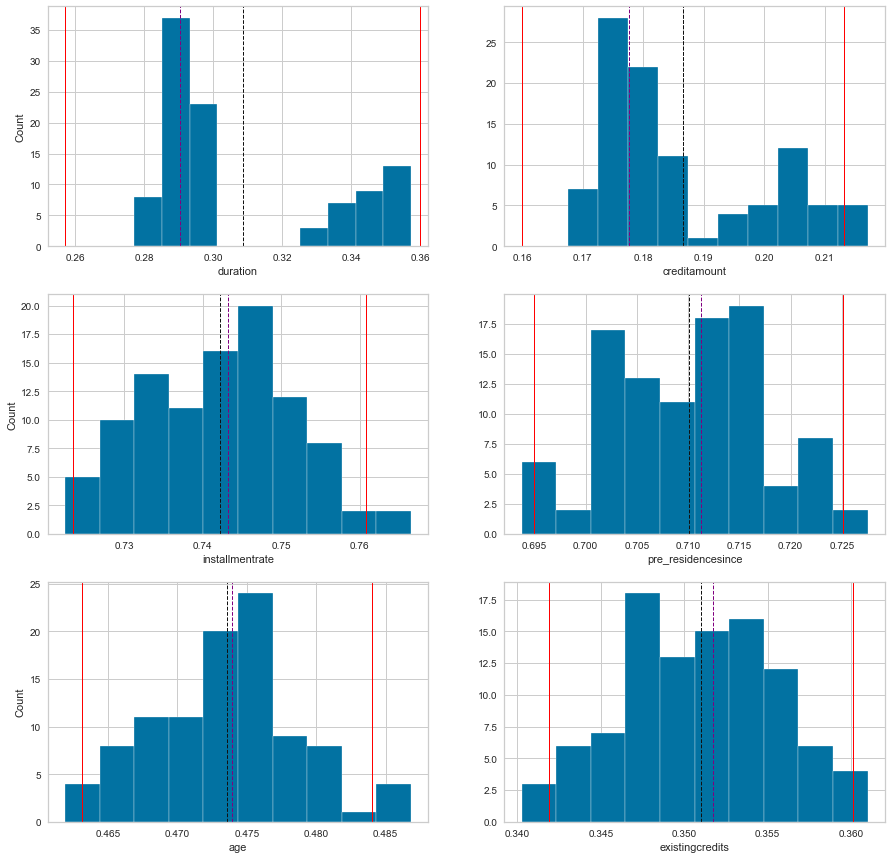

In [112]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B100_his.png')

### Bootstrap 100: LR

In [113]:
pd.options.display.float_format = "{:,.2f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,35.00,127.00,11.00,27.00,0.81
1,bootstrap 2,39.00,120.00,18.00,23.00,0.80
2,bootstrap 3,35.00,121.00,17.00,27.00,0.78
3,bootstrap 4,42.00,114.00,24.00,20.00,0.78
4,bootstrap 5,33.00,123.00,15.00,29.00,0.78
...,...,...,...,...,...,...
97,bootstrap 98,38.00,121.00,17.00,24.00,0.80
98,bootstrap 99,34.00,126.00,12.00,28.00,0.80
99,bootstrap 100,36.00,119.00,19.00,26.00,0.78
100,Mean,36.60,120.79,17.21,25.40,0.79


### Bootstrap 100: SVM

In [114]:
pd.options.display.float_format = "{:,.2f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,33.00,127.00,11.00,29.00,0.80
1,bootstrap 2,39.00,121.00,17.00,23.00,0.80
2,bootstrap 3,37.00,119.00,19.00,25.00,0.78
3,bootstrap 4,41.00,114.00,24.00,21.00,0.78
4,bootstrap 5,34.00,123.00,15.00,28.00,0.79
...,...,...,...,...,...,...
97,bootstrap 98,37.00,125.00,13.00,25.00,0.81
98,bootstrap 99,38.00,125.00,13.00,24.00,0.81
99,bootstrap 100,35.00,124.00,14.00,27.00,0.80
100,Mean,36.60,121.38,16.62,25.40,0.79


### Bootstrap 1000 iterations

In [115]:
%%time
# values = transform_data_clean.values
values2 = transform_data_clean.values

n_iterations2 = 1000

lr_data2 = []
lr_models2 = []
bootstrap_datas2 = []
bootstrap_mean2 = []
svm_data2 = []
svm_models2 = []

n_size2 = int(len(transform_data_clean))
for i in range(1,n_iterations2+1):
    bootstrap2 = resample(values2, replace=True, n_samples=n_size2)
    bootstrap_df2 = pd.DataFrame(bootstrap2, columns=column_names)
    bootstrap_max2 = bootstrap_df2.max()
    bootstrap_norm_df2 = bootstrap_df2 / bootstrap_max2
    bootstrap_datas2.append(bootstrap_norm_df2)
    bootstrap_mean2.append(bootstrap_norm_df2.mean())
         
    X2 = bootstrap_norm_df2.drop('classification', axis = 1)
    y2 = bootstrap_norm_df2['classification']
    
    # Logistic Regression
    lr_model2 = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model2.fit(X2,y2)
    lr_pred2 = lr_model2.predict(X_test_norm)
    
    lr_accu2 = accuracy_score(y_test, lr_pred2)
    lr_cfm2 = confusion_matrix(y_test, lr_pred2)
    
    tn2,fp2,fn2,tp2 = lr_cfm2.flatten()
    lr_data2.append([f'bootstrap {str(i)}',tp2,tn2,fp2,fn2,lr_accu2])
    lr_models2.append(lr_model2)
    
    # SVM
    svm_clf2 = SVC(kernel='linear', probability=True)
    svm_clf2.fit(X2,y2)
    svm_pred2 = svm_clf2.predict(X_test_norm)
    svm_accu2 = accuracy_score(y_test, svm_pred2)
    svm_cfm2 = confusion_matrix(y_test, svm_pred2)

    tn2,fp2,fn2,tp2 = svm_cfm2.flatten()
    svm_data2.append([f'bootstrap {str(i)}',tp2,tn2,fp2,fn2,svm_accu2])
    svm_models2.append(svm_clf2)

Wall time: 5min 5s


In [116]:
b1000_mean_df = pd.DataFrame(bootstrap_mean2, columns=column_names)

### Bootstrap 1000: Mean & Standard Deviation

In [117]:
b1000_mean_df1 = b1000_mean_df.append({k:v for v,k in zip([*b1000_mean_df.mean().values ],column_names)}, ignore_index=True)
b1000_mean_df1.append({k:v for v,k in zip([*b1000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.29,0.17,0.75,0.71,0.47,0.35,0.56,0.29,0.27,0.28,...,0.70,0.11,0.02,0.21,0.64,0.13,0.62,0.38,0.97,0.03
1,0.35,0.18,0.75,0.72,0.47,0.35,0.58,0.32,0.26,0.28,...,0.72,0.10,0.02,0.20,0.66,0.12,0.60,0.40,0.96,0.04
2,0.35,0.21,0.75,0.71,0.48,0.36,0.57,0.32,0.28,0.28,...,0.71,0.12,0.02,0.20,0.62,0.15,0.58,0.42,0.96,0.04
3,0.29,0.18,0.75,0.72,0.49,0.35,0.58,0.30,0.28,0.25,...,0.71,0.11,0.03,0.20,0.61,0.15,0.57,0.42,0.96,0.04
4,0.29,0.17,0.75,0.72,0.49,0.35,0.58,0.31,0.27,0.28,...,0.72,0.11,0.03,0.20,0.62,0.15,0.60,0.40,0.96,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.33,0.20,0.74,0.72,0.47,0.35,0.57,0.28,0.29,0.27,...,0.72,0.10,0.01,0.22,0.64,0.13,0.62,0.38,0.96,0.04
998,0.35,0.18,0.74,0.72,0.47,0.35,0.59,0.30,0.28,0.28,...,0.70,0.12,0.03,0.20,0.62,0.15,0.58,0.41,0.96,0.04
999,0.29,0.20,0.76,0.70,0.48,0.35,0.58,0.30,0.25,0.27,...,0.75,0.10,0.02,0.22,0.64,0.12,0.59,0.41,0.96,0.04
1000,0.31,0.19,0.74,0.71,0.47,0.35,0.58,0.30,0.28,0.27,...,0.71,0.11,0.02,0.20,0.63,0.15,0.60,0.40,0.96,0.04


### Botstrap 1000: Confidence Interval

In [118]:
d_b1000_lb = b1000_mean_df['duration'].mean() - 1.96 * b1000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b1000_lb)
d_b1000_ub = b1000_mean_df['duration'].mean() + 1.96 * b1000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b1000_ub)
print('Duration:95% Confidence Interval :', [d_b1000_lb,d_b1000_ub])

cr_b1000_lb = b1000_mean_df['creditamount'].mean() - 1.96 * b1000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b1000_lb)
cr_b1000_ub = b1000_mean_df['creditamount'].mean() + 1.96 * b1000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b1000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b1000_lb,cr_b1000_ub])

i_b1000_lb = b1000_mean_df['installmentrate'].mean() - 1.96 * b1000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b1000_lb)
i_b1000_ub = b1000_mean_df['installmentrate'].mean() + 1.96 * b1000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b1000_ub)
print('installmentrate:95% Confidence Interval :', [i_b1000_lb,i_b1000_ub])

pr_b1000_lb = b1000_mean_df['pre_residencesince'].mean() - 1.96 * b1000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b1000_lb)
pr_b1000_ub = b1000_mean_df['pre_residencesince'].mean() + 1.96 * b1000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b1000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b1000_lb,pr_b1000_ub])

a_b1000_lb = b1000_mean_df['age'].mean() - 1.96 * b1000_mean_df['age'].std()
print('age:Lower Boundary :', a_b1000_lb)
a_b1000_ub = b1000_mean_df['age'].mean() + 1.96 * b1000_mean_df['age'].std()
print('age:Upper Boundary :', a_b1000_ub)
print('age:95% Confidence Interval :', [a_b1000_lb,a_b1000_ub])

e_b1000_lb = b1000_mean_df['existingcredits'].mean() - 1.96 * b1000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b1000_lb)
e_b1000_ub = b1000_mean_df['existingcredits'].mean() + 1.96 * b1000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b1000_ub)
print('existingcredits:95% Confidence Interval :', [e_b1000_lb,e_b1000_ub])

Duration:Lower Boundary : 0.25613493543250565
Duration:Upper Boundary : 0.36543900901193893
Duration:95% Confidence Interval : [0.25613493543250565, 0.36543900901193893]
Credit Amount:Lower Boundary : 0.16035787960209094
Credit Amount:Upper Boundary : 0.21423032993344063
Credit Amount:95% Confidence Interval : [0.16035787960209094, 0.21423032993344063]
installmentrate:Lower Boundary : 0.7260969861016368
installmentrate:Upper Boundary : 0.7606650138983647
installmentrate:95% Confidence Interval : [0.7260969861016368, 0.7606650138983647]
installmentrate:Lower Boundary : 0.694080111322725
installmentrate:Upper Boundary : 0.727934388677275
installmentrate:95% Confidence Interval : [0.694080111322725, 0.727934388677275]
age:Lower Boundary : 0.4644434818598984
age:Upper Boundary : 0.4853659812031654
age:95% Confidence Interval : [0.4644434818598984, 0.4853659812031654]
existingcredits:Lower Boundary : 0.3378477986876997
existingcredits:Upper Boundary : 0.3661687013122998
existingcredits:95% 

### Bootstrap 1000: Histogram

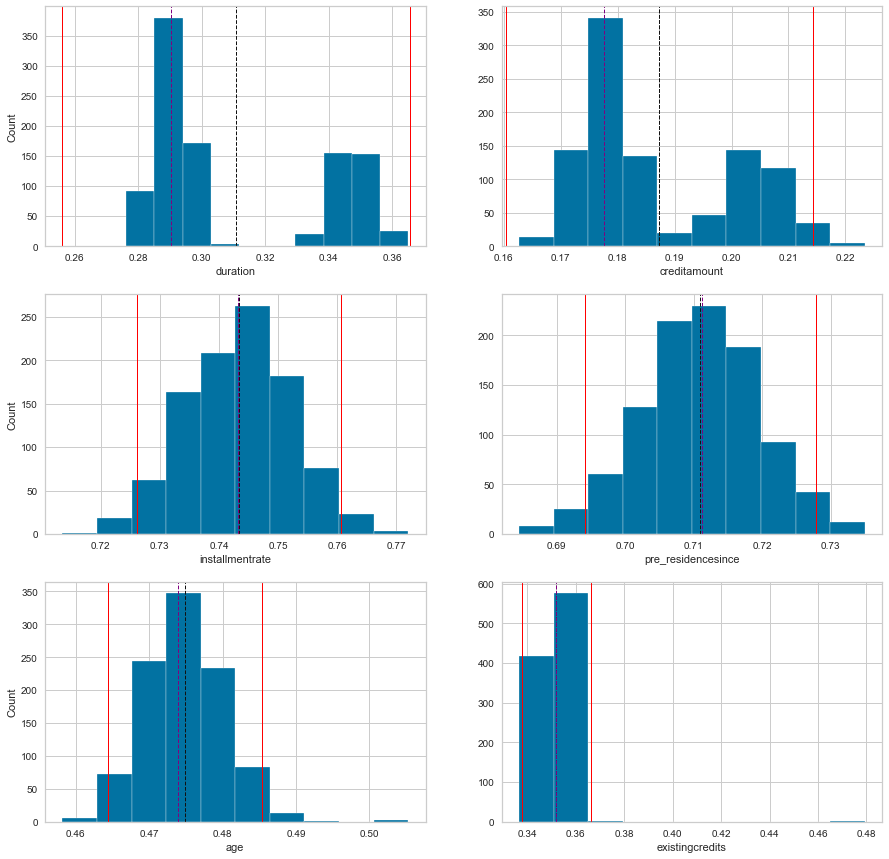

In [119]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b1000_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b1000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b1000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b1000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b1000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b1000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b1000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b1000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b1000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b1000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b1000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b1000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b1000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b1000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b1000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b1000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b1000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b1000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b1000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b1000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b1000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b1000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b1000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b1000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b1000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B1000_his.png')

### Bootstrap 1000: LR

In [120]:
pd.options.display.float_format = "{:,.2f}".format
lr_df2 = pd.DataFrame(lr_data2,columns=column_names1)
df3 = lr_df2.append({k:v for v,k in zip(['Mean',*lr_df2.mean().values ],column_names1)}, ignore_index=True)
df3.append({k:v for v,k in zip(['Std',*lr_df2.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,32.00,116.00,22.00,30.00,0.74
1,bootstrap 2,35.00,120.00,18.00,27.00,0.78
2,bootstrap 3,37.00,122.00,16.00,25.00,0.80
3,bootstrap 4,36.00,121.00,17.00,26.00,0.79
4,bootstrap 5,44.00,114.00,24.00,18.00,0.79
...,...,...,...,...,...,...
997,bootstrap 998,29.00,128.00,10.00,33.00,0.79
998,bootstrap 999,38.00,121.00,17.00,24.00,0.80
999,bootstrap 1000,37.00,117.00,21.00,25.00,0.77
1000,Mean,36.68,121.31,16.69,25.32,0.79


### Bootstrap 1000: SVM

In [121]:
pd.options.display.float_format = "{:,.2f}".format
svm_df2 = pd.DataFrame(svm_data2,columns=column_names1)
df4 = svm_df2.append({k:v for v,k in zip(['Mean',*svm_df2.mean().values ],column_names1)}, ignore_index=True)
df4.append({k:v for v,k in zip(['Std',*svm_df2.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,32.00,120.00,18.00,30.00,0.76
1,bootstrap 2,35.00,118.00,20.00,27.00,0.77
2,bootstrap 3,39.00,121.00,17.00,23.00,0.80
3,bootstrap 4,38.00,115.00,23.00,24.00,0.77
4,bootstrap 5,43.00,115.00,23.00,19.00,0.79
...,...,...,...,...,...,...
997,bootstrap 998,29.00,129.00,9.00,33.00,0.79
998,bootstrap 999,36.00,129.00,9.00,26.00,0.82
999,bootstrap 1000,34.00,119.00,19.00,28.00,0.77
1000,Mean,36.91,121.59,16.41,25.09,0.79


### Bootstrap 5000 iterations

In [136]:
%%time
# values = transform_data_clean.values
n_iterations3 = 5000

lr_data3 = []
lr_models3 = []
bootstrap_datas3 = []
bootstrap_mean3 = []
svm_data3 = []
svm_models3 = []

n_size3 = int(len(transform_data_clean))
for i in range(1,n_iterations3+1):
    bootstrap3 = resample(values, replace=True, n_samples=n_size3)
    bootstrap_df3 = pd.DataFrame(bootstrap3, columns=column_names)
    bootstrap_max3 = bootstrap_df3.max()
    bootstrap_norm_df3 = bootstrap_df3 / bootstrap_max3
    bootstrap_datas3.append(bootstrap_norm_df3)
    bootstrap_mean3.append(bootstrap_norm_df3.mean())
         
    X3 = bootstrap_norm_df3.drop('classification', axis = 1)
    y3 = bootstrap_norm_df3['classification']
    
    # Logistic Regression
    lr_model3 = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model3.fit(X3,y3)
    lr_pred3 = lr_model3.predict(X_test_norm)
    
    lr_accu3 = accuracy_score(y_test, lr_pred3)
    lr_cfm3 = confusion_matrix(y_test, lr_pred3)
    
    tn3,fp3,fn3,tp3 = lr_cfm3.flatten()
    lr_data3.append([f'bootstrap {str(i)}',tp3,tn3,fp3,fn3,lr_accu3])
    lr_models3.append(lr_model3)
    
    # SVM
    svm_clf3 = SVC(kernel='linear')
    svm_clf3.fit(X3,y3)
    svm_pred3 = svm_clf3.predict(X_test_norm)
    svm_accu3 = accuracy_score(y_test, svm_pred3)
    svm_cfm3 = confusion_matrix(y_test, svm_pred3)

    tn3,fp3,fn3,tp3 = svm_cfm3.flatten()
    svm_data3.append([f'bootstrap {str(i)}',tp3,tn3,fp3,fn3,svm_accu3])
    svm_models3.append(svm_clf3)

Wall time: 10min 54s


In [138]:
b5000_mean_df = pd.DataFrame(bootstrap_mean3, columns=column_names)

### Bootstrap 5000: Mean & Standard Deviation

In [139]:
b5000_mean_df1 = b5000_mean_df.append({k:v for v,k in zip([*b5000_mean_df.mean().values ],column_names)}, ignore_index=True)
b5000_mean_df1.append({k:v for v,k in zip([*b5000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.29,0.18,0.73,0.70,0.49,0.36,0.59,0.28,0.26,0.27,...,0.72,0.11,0.02,0.21,0.62,0.15,0.59,0.41,0.96,0.04
1,0.28,0.18,0.73,0.72,0.48,0.35,0.58,0.30,0.27,0.27,...,0.70,0.10,0.01,0.22,0.62,0.15,0.62,0.38,0.96,0.04
2,0.35,0.20,0.73,0.71,0.48,0.36,0.58,0.33,0.28,0.28,...,0.72,0.10,0.03,0.21,0.60,0.16,0.60,0.40,0.96,0.04
3,0.36,0.18,0.74,0.70,0.47,0.35,0.59,0.33,0.26,0.28,...,0.70,0.12,0.03,0.22,0.60,0.16,0.61,0.39,0.96,0.04
4,0.29,0.21,0.76,0.71,0.48,0.36,0.58,0.30,0.28,0.26,...,0.71,0.12,0.02,0.22,0.62,0.15,0.59,0.41,0.97,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,0.29,0.21,0.75,0.71,0.48,0.36,0.58,0.29,0.29,0.26,...,0.70,0.11,0.02,0.19,0.63,0.16,0.60,0.40,0.96,0.04
4998,0.29,0.18,0.74,0.70,0.47,0.35,0.58,0.32,0.26,0.28,...,0.71,0.10,0.03,0.21,0.61,0.15,0.59,0.41,0.96,0.04
4999,0.29,0.18,0.74,0.72,0.48,0.35,0.58,0.29,0.29,0.26,...,0.70,0.10,0.02,0.18,0.66,0.14,0.58,0.42,0.96,0.04
5000,0.31,0.19,0.74,0.71,0.47,0.35,0.58,0.30,0.27,0.27,...,0.71,0.11,0.02,0.20,0.63,0.15,0.60,0.40,0.96,0.04


### Botstrap 5000: Confidence Interval

In [140]:
d_b5000_lb = b5000_mean_df['duration'].mean() - 1.96 * b5000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b5000_lb)
d_b5000_ub = b5000_mean_df['duration'].mean() + 1.96 * b5000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b5000_ub)
print('Duration:95% Confidence Interval :', [d_b5000_lb,d_b5000_ub])

cr_b5000_lb = b5000_mean_df['creditamount'].mean() - 1.96 * b5000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b5000_lb)
cr_b5000_ub = b5000_mean_df['creditamount'].mean() + 1.96 * b5000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b5000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b5000_lb,cr_b5000_ub])

i_b5000_lb = b5000_mean_df['installmentrate'].mean() - 1.96 * b5000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b5000_lb)
i_b5000_ub = b5000_mean_df['installmentrate'].mean() + 1.96 * b5000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b5000_ub)
print('installmentrate:95% Confidence Interval :', [i_b5000_lb,i_b5000_ub])

pr_b5000_lb = b5000_mean_df['pre_residencesince'].mean() - 1.96 * b5000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b5000_lb)
pr_b5000_ub = b5000_mean_df['pre_residencesince'].mean() + 1.96 * b5000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b5000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b5000_lb,pr_b5000_ub])

a_b5000_lb = b5000_mean_df['age'].mean() - 1.96 * b5000_mean_df['age'].std()
print('age:Lower Boundary :', a_b5000_lb)
a_b5000_ub = b5000_mean_df['age'].mean() + 1.96 * b5000_mean_df['age'].std()
print('age:Upper Boundary :', a_b5000_ub)
print('age:95% Confidence Interval :', [a_b5000_lb,a_b5000_ub])

e_b5000_lb = b5000_mean_df['existingcredits'].mean() - 1.96 * b5000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b5000_lb)
e_b5000_ub = b5000_mean_df['existingcredits'].mean() + 1.96 * b5000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b5000_ub)
print('existingcredits:95% Confidence Interval :', [e_b5000_lb,e_b5000_ub])

Duration:Lower Boundary : 0.2572801930321856
Duration:Upper Boundary : 0.3672979758567025
Duration:95% Confidence Interval : [0.2572801930321856, 0.3672979758567025]
Credit Amount:Lower Boundary : 0.16020104279319136
Credit Amount:Upper Boundary : 0.21548544430479194
Credit Amount:95% Confidence Interval : [0.16020104279319136, 0.21548544430479194]
installmentrate:Lower Boundary : 0.7261170334399231
installmentrate:Upper Boundary : 0.7607814665600693
installmentrate:95% Confidence Interval : [0.7261170334399231, 0.7607814665600693]
installmentrate:Lower Boundary : 0.6943058067295197
installmentrate:Upper Boundary : 0.727947293270479
installmentrate:95% Confidence Interval : [0.6943058067295197, 0.727947293270479]
age:Lower Boundary : 0.46427113237327144
age:Upper Boundary : 0.4855713785701764
age:95% Confidence Interval : [0.46427113237327144, 0.4855713785701764]
existingcredits:Lower Boundary : 0.33787390296994285
existingcredits:Upper Boundary : 0.3661821970300572
existingcredits:95%

### Bootstrap 5000: Histogram

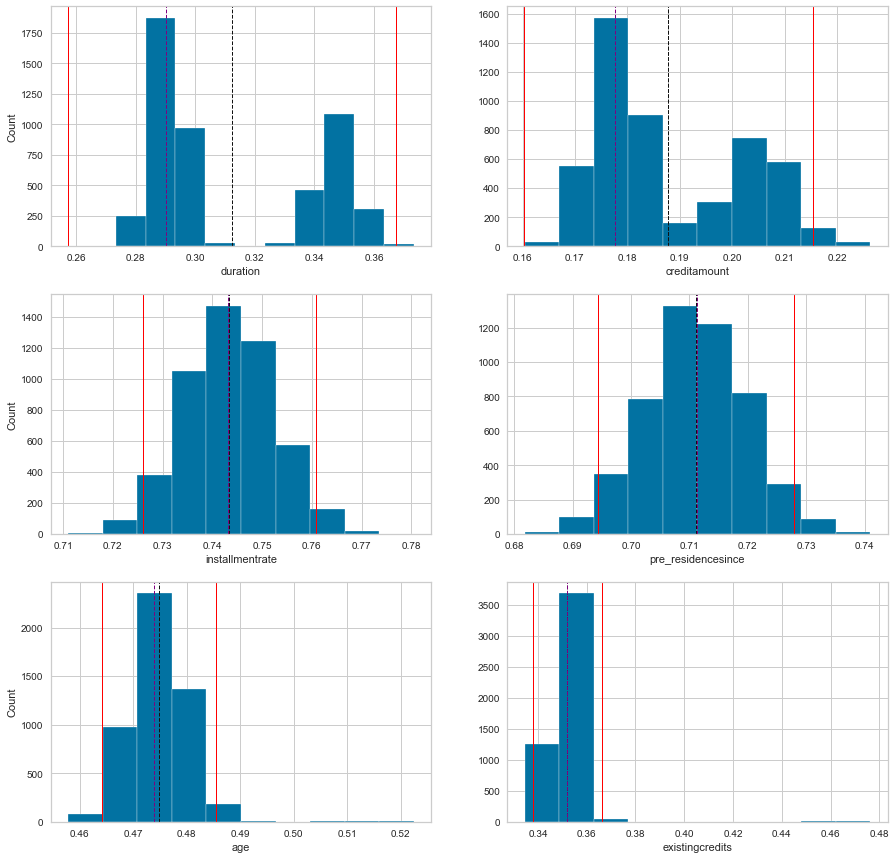

In [141]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b5000_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b5000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b5000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b5000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b5000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b5000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b5000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b5000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b5000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b5000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b5000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b5000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b5000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b5000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b5000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b5000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b5000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b5000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b5000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b5000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b5000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b5000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b5000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b5000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b5000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B5000_his.png')

### Bootstrap 5000: LR

In [142]:
pd.options.display.float_format = "{:,.2f}".format
lr_df3 = pd.DataFrame(lr_data3,columns=column_names1)
df5 = lr_df3.append({k:v for v,k in zip(['Mean',*lr_df3.mean().values ],column_names1)}, ignore_index=True)
df5.append({k:v for v,k in zip(['Std',*lr_df3.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,35.00,121.00,17.00,27.00,0.78
1,bootstrap 2,36.00,122.00,16.00,26.00,0.79
2,bootstrap 3,38.00,115.00,23.00,24.00,0.77
3,bootstrap 4,39.00,126.00,12.00,23.00,0.82
4,bootstrap 5,38.00,125.00,13.00,24.00,0.81
...,...,...,...,...,...,...
4997,bootstrap 4998,39.00,119.00,19.00,23.00,0.79
4998,bootstrap 4999,41.00,121.00,17.00,21.00,0.81
4999,bootstrap 5000,37.00,120.00,18.00,25.00,0.79
5000,Mean,36.53,121.36,16.64,25.47,0.79


### Bootstrap 5000: SVM

In [143]:
pd.options.display.float_format = "{:,.2f}".format
svm_df3 = pd.DataFrame(svm_data3,columns=column_names1)
df6 = svm_df3.append({k:v for v,k in zip(['Mean',*svm_df3.mean().values ],column_names1)}, ignore_index=True)
df6.append({k:v for v,k in zip(['Std',*svm_df3.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,38.00,122.00,16.00,24.00,0.80
1,bootstrap 2,36.00,125.00,13.00,26.00,0.81
2,bootstrap 3,36.00,116.00,22.00,26.00,0.76
3,bootstrap 4,36.00,128.00,10.00,26.00,0.82
4,bootstrap 5,37.00,124.00,14.00,25.00,0.81
...,...,...,...,...,...,...
4997,bootstrap 4998,38.00,123.00,15.00,24.00,0.81
4998,bootstrap 4999,37.00,125.00,13.00,25.00,0.81
4999,bootstrap 5000,33.00,119.00,19.00,29.00,0.76
5000,Mean,36.74,121.67,16.33,25.26,0.79


### Bootstrap 10,000 iterations

In [161]:
%%time
n_iterations4 = 10000
lr_data4 = []
lr_models4 = []
bootstrap_datas4 = []
bootstrap_mean4 = []
svm_data4 = []
svm_models4 = []
n_size4 = 1000

Wall time: 1.09 s


In [162]:
%%time
for i in range(1,n_iterations4+1):
    bootstrap4 = resample(values, replace=True, n_samples=1000)
    bootstrap_df4 = pd.DataFrame(bootstrap4, columns=column_names)
    bootstrap_max4 = bootstrap_df4.max()
    bootstrap_norm_df4 = bootstrap_df4 / bootstrap_max4
    bootstrap_datas4.append(bootstrap_norm_df4)
    bootstrap_mean4.append(bootstrap_norm_df4.mean())
         
    X4 = bootstrap_norm_df4.drop('classification', axis = 1)
    y4 = bootstrap_norm_df4['classification']
    
    # Logistic Regression
    lr_model4 = LogisticRegression(class_weight=None, random_state=15, max_iter=1000)
    lr_model4.fit(X4,y4)
    lr_pred4 = lr_model4.predict(X_test_norm)
    
    lr_accu4 = accuracy_score(y_test, lr_pred4)
    lr_cfm4 = confusion_matrix(y_test, lr_pred4)
    
    tn4,fp4,fn4,tp4 = lr_cfm4.flatten()
    lr_data4.append([f'bootstrap {str(i)}',tp4,tn4,fp4,fn4,lr_accu4])
    lr_models4.append(lr_model4)
    
    # SVM
    svm_clf4 = SVC(kernel='linear')
    svm_clf4.fit(X4,y4)
    svm_pred4 = svm_clf4.predict(X_test_norm)
    svm_accu4 = accuracy_score(y_test, svm_pred4)
    svm_cfm4 = confusion_matrix(y_test, svm_pred4)

    tn4,fp4,fn4,tp4 = svm_cfm4.flatten()
    svm_data4.append([f'bootstrap {str(i)}',tp4,tn4,fp4,fn4,svm_accu4])
    svm_models4.append(svm_clf4)

Wall time: 20min 5s


In [163]:
b10000_mean_df = pd.DataFrame(bootstrap_mean4, columns=column_names)

### Bootstrap 10,000: Mean & Standard Deviation

In [164]:
b10000_mean_df1 = b10000_mean_df.append({k:v for v,k in zip([*b10000_mean_df.mean().values ],column_names)}, ignore_index=True)
b10000_mean_df1.append({k:v for v,k in zip([*b10000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.35,0.21,0.75,0.72,0.48,0.36,0.57,0.30,0.26,0.29,...,0.72,0.11,0.03,0.20,0.60,0.17,0.57,0.43,0.96,0.04
1,0.30,0.18,0.73,0.71,0.47,0.35,0.57,0.30,0.27,0.28,...,0.70,0.11,0.03,0.20,0.62,0.15,0.57,0.43,0.97,0.03
2,0.29,0.21,0.73,0.70,0.48,0.35,0.57,0.30,0.27,0.30,...,0.71,0.12,0.03,0.19,0.61,0.17,0.59,0.41,0.96,0.04
3,0.30,0.21,0.74,0.71,0.48,0.36,0.58,0.32,0.28,0.27,...,0.71,0.11,0.02,0.22,0.60,0.16,0.58,0.42,0.96,0.04
4,0.34,0.18,0.75,0.72,0.48,0.36,0.59,0.29,0.26,0.26,...,0.75,0.10,0.02,0.21,0.63,0.14,0.59,0.41,0.95,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.29,0.18,0.74,0.71,0.48,0.35,0.58,0.31,0.29,0.27,...,0.71,0.10,0.03,0.20,0.64,0.14,0.62,0.38,0.96,0.04
9998,0.29,0.18,0.73,0.70,0.47,0.35,0.58,0.29,0.27,0.25,...,0.71,0.11,0.02,0.20,0.63,0.16,0.60,0.40,0.97,0.03
9999,0.34,0.20,0.74,0.72,0.47,0.35,0.59,0.29,0.28,0.26,...,0.67,0.13,0.03,0.21,0.62,0.14,0.61,0.39,0.96,0.04
10000,0.31,0.19,0.74,0.71,0.47,0.35,0.58,0.30,0.27,0.27,...,0.71,0.11,0.02,0.20,0.63,0.15,0.60,0.40,0.96,0.04


### Botstrap 10,000: Confidence Interval

In [165]:
d_b10000_lb = b10000_mean_df['duration'].mean() - 1.96 * b10000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b10000_lb)
d_b10000_ub = b10000_mean_df['duration'].mean() + 1.96 * b10000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b10000_ub)
print('Duration:95% Confidence Interval :', [d_b10000_lb,d_b10000_ub])

cr_b10000_lb = b10000_mean_df['creditamount'].mean() - 1.96 * b10000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b10000_lb)
cr_b10000_ub = b10000_mean_df['creditamount'].mean() + 1.96 * b10000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b10000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b10000_lb,cr_b10000_ub])

i_b10000_lb = b10000_mean_df['installmentrate'].mean() - 1.96 * b10000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b10000_lb)
i_b10000_ub = b10000_mean_df['installmentrate'].mean() + 1.96 * b10000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b10000_ub)
print('installmentrate:95% Confidence Interval :', [i_b10000_lb,i_b10000_ub])

pr_b10000_lb = b10000_mean_df['pre_residencesince'].mean() - 1.96 * b10000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b10000_lb)
pr_b10000_ub = b10000_mean_df['pre_residencesince'].mean() + 1.96 * b10000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b10000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b10000_lb,pr_b10000_ub])

a_b10000_lb = b10000_mean_df['age'].mean() - 1.96 * b10000_mean_df['age'].std()
print('age:Lower Boundary :', a_b10000_lb)
a_b10000_ub = b10000_mean_df['age'].mean() + 1.96 * b10000_mean_df['age'].std()
print('age:Upper Boundary :', a_b10000_ub)
print('age:95% Confidence Interval :', [a_b10000_lb,a_b10000_ub])

e_b10000_lb = b10000_mean_df['existingcredits'].mean() - 1.96 * b10000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b10000_lb)
e_b10000_ub = b10000_mean_df['existingcredits'].mean() + 1.96 * b10000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b10000_ub)
print('existingcredits:95% Confidence Interval :', [e_b10000_lb,e_b10000_ub])

Duration:Lower Boundary : 0.2568257876539317
Duration:Upper Boundary : 0.3657628434571817
Duration:95% Confidence Interval : [0.2568257876539317, 0.3657628434571817]
Credit Amount:Lower Boundary : 0.16043996853399994
Credit Amount:Upper Boundary : 0.2157011834521384
Credit Amount:95% Confidence Interval : [0.16043996853399994, 0.2157011834521384]
installmentrate:Lower Boundary : 0.725487629794382
installmentrate:Upper Boundary : 0.7606615702056261
installmentrate:95% Confidence Interval : [0.725487629794382, 0.7606615702056261]
installmentrate:Lower Boundary : 0.6938996328968691
installmentrate:Upper Boundary : 0.7283651171031306
installmentrate:95% Confidence Interval : [0.6938996328968691, 0.7283651171031306]
age:Lower Boundary : 0.4642699411387528
age:Upper Boundary : 0.485475670791292
age:95% Confidence Interval : [0.4642699411387528, 0.485475670791292]
existingcredits:Lower Boundary : 0.33744291972512014
existingcredits:Upper Boundary : 0.36671128027488614
existingcredits:95% Conf

### Bootstrap 10,000: Histogram

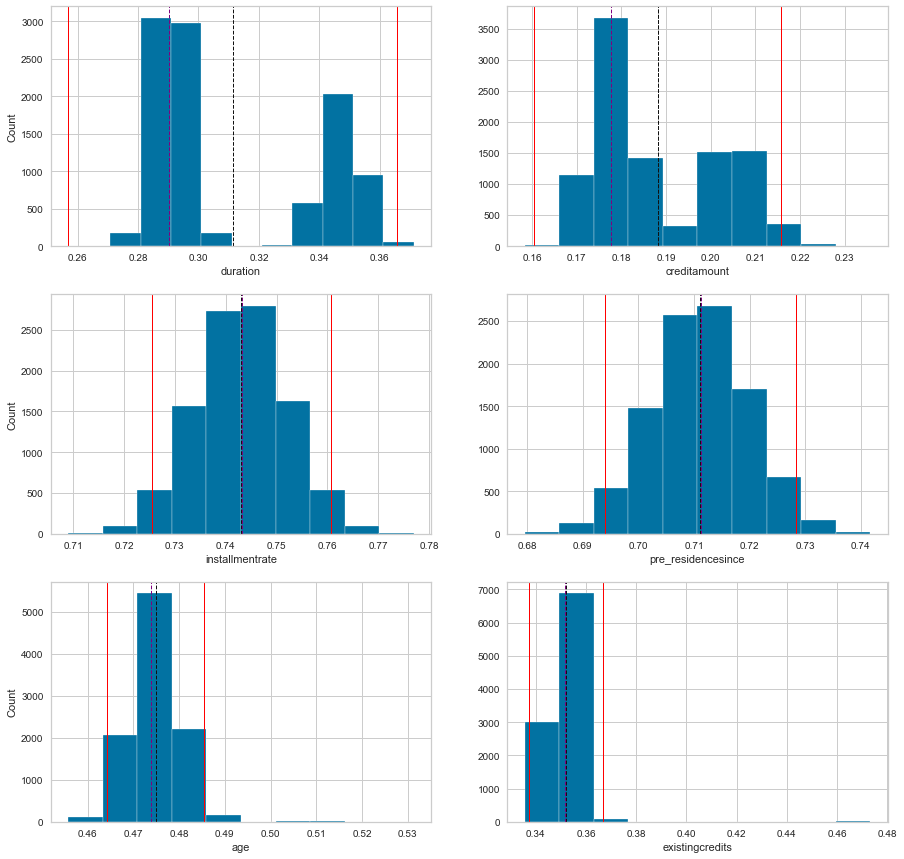

In [166]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b10000_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b10000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b10000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b10000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b10000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b10000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b10000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b10000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b10000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b10000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b10000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b10000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b10000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b10000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b10000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b10000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b10000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b10000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b10000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b10000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b10000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b10000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b10000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b10000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b10000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B10000_his.png')

### Bootstrap 10,000: LR

In [167]:
pd.options.display.float_format = "{:,.3f}".format
lr_df4 = pd.DataFrame(lr_data4,columns=column_names1)
df7 = lr_df4.append({k:v for v,k in zip(['Mean',*lr_df4.mean().values ],column_names1)}, ignore_index=True)
df7.append({k:v for v,k in zip(['Std',*lr_df4.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,38.000,121.000,17.000,24.000,0.795
1,bootstrap 2,35.000,120.000,18.000,27.000,0.775
2,bootstrap 3,35.000,120.000,18.000,27.000,0.775
3,bootstrap 4,40.000,116.000,22.000,22.000,0.780
4,bootstrap 5,36.000,122.000,16.000,26.000,0.790
...,...,...,...,...,...,...
9997,bootstrap 9998,38.000,121.000,17.000,24.000,0.795
9998,bootstrap 9999,33.000,117.000,21.000,29.000,0.750
9999,bootstrap 10000,35.000,127.000,11.000,27.000,0.810
10000,Mean,36.607,121.344,16.656,25.393,0.790


### Bootstrap 10,000: SVM

In [168]:
pd.options.display.float_format = "{:,.2f}".format
svm_df4 = pd.DataFrame(svm_data4,columns=column_names1)
df8 = svm_df4.append({k:v for v,k in zip(['Mean',*svm_df4.mean().values ],column_names1)}, ignore_index=True)
df8.append({k:v for v,k in zip(['Std',*svm_df4.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,41.00,121.00,17.00,21.00,0.81
1,bootstrap 2,36.00,120.00,18.00,26.00,0.78
2,bootstrap 3,37.00,122.00,16.00,25.00,0.80
3,bootstrap 4,39.00,116.00,22.00,23.00,0.78
4,bootstrap 5,32.00,124.00,14.00,30.00,0.78
...,...,...,...,...,...,...
9997,bootstrap 9998,42.00,115.00,23.00,20.00,0.79
9998,bootstrap 9999,34.00,116.00,22.00,28.00,0.75
9999,bootstrap 10000,32.00,130.00,8.00,30.00,0.81
10000,Mean,36.77,121.70,16.30,25.23,0.79


## Random Oversampling the minority class from the original dataset

In [85]:
# ov_raw = transform_data_clean.copy()
ov_raw = transform_data_clean.copy()

### Seperate Minority & Majority class

In [86]:
bad_credit = ov_raw[ov_raw.classification==1]
good_credit = ov_raw[ov_raw.classification==0]

In [87]:
bad_credit_oversample = resample(bad_credit, replace=True, n_samples=len(good_credit))

In [88]:
ov_df = pd.concat([good_credit,bad_credit_oversample])

In [89]:
column_max_ov = ov_df.max()
norm_ov_df = ov_df / column_max_ov

In [90]:
norm_ov_df.describe().to_excel('ov_df.xlsx',index=True, header=True)

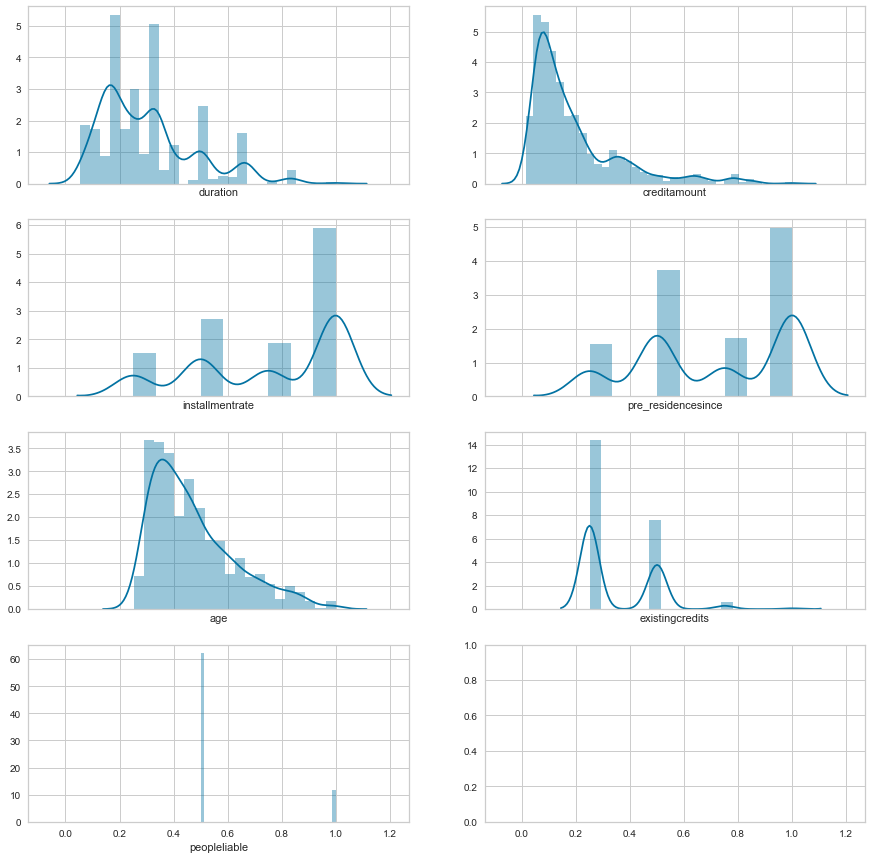

In [91]:
f, axes = plt.subplots(4,2 , figsize=(15, 15), sharex=True)
sns.distplot(norm_ov_df['duration'], ax = axes[0,0])
sns.distplot(norm_ov_df['creditamount'], ax=axes[0,1])
sns.distplot(norm_ov_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(norm_ov_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(norm_ov_df["age"] , ax=axes[2, 0])
sns.distplot(norm_ov_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(norm_ov_df["peopleliable"] , ax=axes[3, 0])
plt.savefig('oversampling_dist.png')

In [92]:
X6 = norm_ov_df.drop('classification', axis = 1)
y6 = norm_ov_df['classification']

In [93]:
ovlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ovlr.fit(X6,y6)
ov_pred = ovlr.predict(X_test_norm)

## LR prediction probability

In [94]:
accu13 = accuracy_score(y_test, ov_pred)
print("accuracy_score : ",accu13)

accuracy_score :  0.765


## Confusion Matrix

In [95]:
cfm_13 = confusion_matrix(y_test, ov_pred)
print (cfm_13)

tn,fp,fn,tp = cfm_13.flatten()

df = df.append({
    'algorithm':'Random Oversample lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu13
},ignore_index=True)

[[102  36]
 [ 11  51]]


## SVM (linear kernel function)

In [96]:
svm_clf_7 = SVC(kernel='linear', probability=True)

In [97]:
svm_clf_7.fit(X6,y6)
ov_pred2 = svm_clf_7.predict(X_test_norm)

## SVM prediction probability

In [98]:
accu14 = accuracy_score(y_test, ov_pred2)
print("accuracy_score : ",accu14)

accuracy_score :  0.785


## Confusion Matrix

In [99]:
cfm_14 = confusion_matrix(y_test, ov_pred2)
print (cfm_14)

tn,fp,fn,tp = cfm_14.flatten()

df = df.append({
    'algorithm':'RandomOversample svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu14
},ignore_index=True)

[[105  33]
 [ 10  52]]


## Undersampling the majority class from the Original

In [100]:
# u_raw = transform_data_clean.copy()
u_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [101]:
bad_credit2 = u_raw[u_raw.classification==1]
good_credit2 = u_raw[u_raw.classification==0]

In [102]:
good_credit_undersample = resample(good_credit2, replace=True, n_samples=len(bad_credit2))

In [103]:
u_df = pd.concat([good_credit_undersample,bad_credit2])

In [104]:
column_max_u = u_df.max()
norm_u_df = u_df / column_max_u

In [105]:
norm_u_df.describe().to_excel('u_df.xlsx',index=True, header=True)

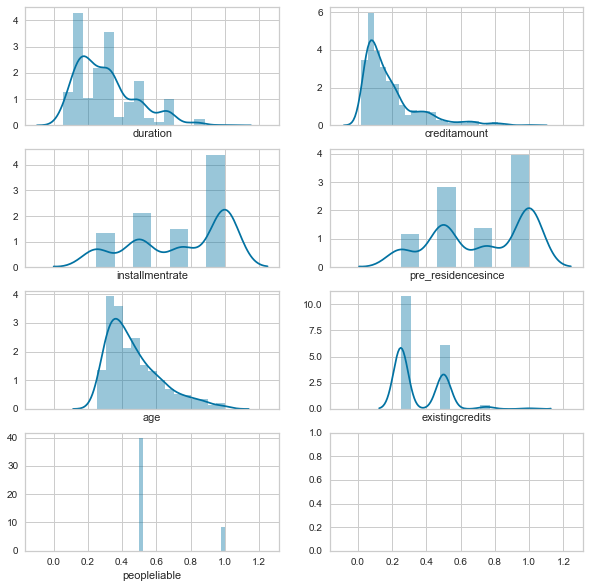

In [106]:
f, axes = plt.subplots(4,2,figsize=(10,10), sharex=True)
sns.distplot(norm_u_df['duration'], ax = axes[0,0])
sns.distplot(norm_u_df['creditamount'], ax = axes[0,1])
sns.distplot(norm_u_df['installmentrate'], ax=axes[1,0])
sns.distplot(norm_u_df['pre_residencesince'], ax=axes[1,1])
sns.distplot(norm_u_df['age'], ax=axes[2,0])
sns.distplot(norm_u_df['existingcredits'], ax=axes[2,1])
sns.distplot(norm_u_df['peopleliable'], ax=axes[3,0])
plt.savefig('undersampling_dist.png')

In [107]:
X7 = norm_u_df.drop('classification', axis = 1)
y7 = norm_u_df['classification']

In [108]:
ulr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ulr.fit(X7,y7)
u_pred = ulr.predict(X_test_norm)

## LR prediction probability

In [109]:
accu15 = accuracy_score(y_test, u_pred)
print("accuracy_score : ",accu15)

accuracy_score :  0.735


## Confusion Matrix

In [110]:
cfm_15 = confusion_matrix(y_test, u_pred)
print (cfm_15)

tn,fp,fn,tp = cfm_15.flatten()

df = df.append({
    'algorithm':'UnderSample lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu15
},ignore_index=True)

[[98 40]
 [13 49]]


## SVM (linear kernel function)

In [111]:
svm_clf_8 = SVC(kernel='linear', probability=True)

In [112]:
svm_clf_8.fit(X7,y7)
u_pred2 = svm_clf_8.predict(X_test_norm)

## SVM prediction probability

In [113]:
accu16 = accuracy_score(y_test, u_pred2)
print("accuracy_score : ",accu16)

accuracy_score :  0.755


## Confusion Matrix

In [114]:
cfm_16 = confusion_matrix(y_test, u_pred2)
print (cfm_16)

tn,fp,fn,tp = cfm_16.flatten()

df = df.append({
    'algorithm':'UnderSample svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu16
},ignore_index=True)

[[101  37]
 [ 12  50]]


## Adding Noise on numercial variables to Original set

In [58]:
transform_data_clean.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# noise = transform_data_clean.copy()
noise = transform_data_clean.copy()

In [60]:
mean_d, std_d = 20.90, 12.06
mean_c, std_c = 3271.26, 2822.74
mean_i, std_i = 2.97, 1.12 
mean_p, std_p = 2.85, 1.10
mean_a, std_a = 35.55, 11.38 
mean_e, std_e = 1.41, 0.58
mean_pe, std_pe = 1.16, 0.36

n_size = int(len(noise))
d_noise = np.random.normal(mean_d, std_d, [n_size,1])
c_noise = np.random.normal(mean_c, std_c, [n_size,1])
i_noise = np.random.normal(mean_i, std_i, [n_size,1])
p_noise = np.random.normal(mean_p, std_p, [n_size,1])
a_noise = np.random.normal(mean_a, std_a, [n_size,1])
e_noise = np.random.normal(mean_e, std_e, [n_size,1])
pe_noise = np.random.normal(mean_pe, std_pe, [n_size,1])

In [61]:
clean_signal_d = pd.DataFrame(data=noise, index=noise.index, columns=['duration'])
clean_signal_c = pd.DataFrame(data=noise, index=noise.index, columns=['creditamount'])
clean_signal_i = pd.DataFrame(data=noise, index=noise.index, columns=['installmentrate'])
clean_signal_p = pd.DataFrame(data=noise, index=noise.index, columns=['pre_residencesince'])
clean_signal_a = pd.DataFrame(data=noise, index=noise.index, columns=['age'])
clean_signal_e = pd.DataFrame(data=noise, index=noise.index, columns=['existingcredits'])
clean_signal_pe = pd.DataFrame(data=noise, index=noise.index, columns=['peopleliable'])

In [62]:
duration_n = clean_signal_d + d_noise
creditamount_n = clean_signal_c + c_noise
installmentrate_n = clean_signal_i + i_noise
pre_residencesince_n = clean_signal_p + p_noise
age_n = clean_signal_a + a_noise
existingcredits_n = clean_signal_e + e_noise
peopleliable_n = clean_signal_pe + pe_noise

In [63]:
noise_or = pd.concat([duration_n, creditamount_n, installmentrate_n, pre_residencesince_n, 
                           age_n,existingcredits_n,peopleliable_n],axis=1)

In [64]:
noise.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable'], axis=1, inplace=True)

In [65]:
noise_df = pd.concat([noise_or,noise],axis=1) 

In [66]:
column_max_noise = noise_df.max()
n_df = noise_df / column_max_noise

In [79]:
skew(n_df[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 0.42113575,  0.72512931, -0.13740651, -0.14052176,  0.34845291,
        0.31888338,  0.75141687])

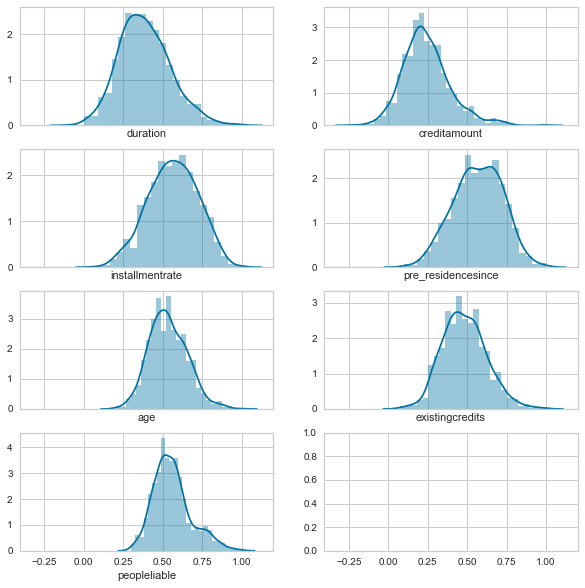

In [81]:
f, axes = plt.subplots(4,2 , figsize=(10, 10), sharex=True)
sns.distplot( n_df["duration"] , ax=axes[0, 0])
sns.distplot( n_df["creditamount"] ,ax=axes[0, 1])
sns.distplot( n_df["installmentrate"] , ax=axes[1, 0])
sns.distplot( n_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( n_df["age"] , ax=axes[2, 0])
sns.distplot( n_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( n_df["peopleliable"] , ax=axes[3, 0])

In [68]:
n_df.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

In [69]:
X8 = n_df.drop('classification', axis = 1)
y8 = n_df['classification']

In [70]:
nlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
nlr.fit(X8,y8)
n_pred = nlr.predict(X_test_norm)

## LR prediction probability

In [71]:
accu17 = accuracy_score(y_test, n_pred)
print("accuracy_score : ",accu17)

accuracy_score :  0.78


## Confusion Matrix

In [72]:
cfm_17 = confusion_matrix(y_test, n_pred)
print (cfm_17)
tn,fp,fn,tp = cfm_17.flatten()

df = df.append({
    'algorithm':'Noise lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu17
},ignore_index=True)

[[118  20]
 [ 24  38]]


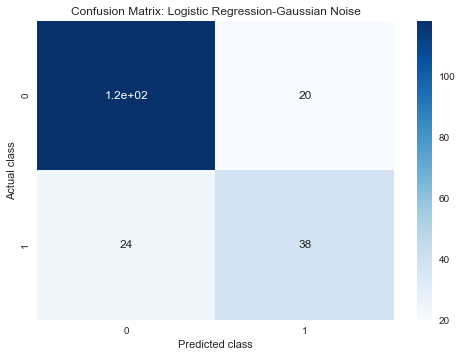

In [73]:
sns.heatmap(cfm_17, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_n.png')

## SVM (linear kernel function)

In [74]:
svm_clf_9 = SVC(kernel='linear', probability=True)

In [75]:
svm_clf_9.fit(X8,y8)
n_pred2 = svm_clf_9.predict(X_test_norm)

## SVM prediction probability

In [76]:
accu18 = accuracy_score(y_test, n_pred2)
print("accuracy_score : ",accu18)

accuracy_score :  0.8


## Confusion Matrix

In [77]:
cfm_18 = confusion_matrix(y_test, n_pred2)
print (cfm_18)

tn,fp,fn,tp = cfm_18.flatten()

df = df.append({
    'algorithm':'Noise svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu18
},ignore_index=True)

[[121  17]
 [ 23  39]]


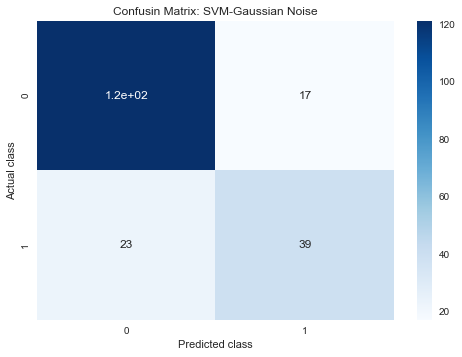

In [78]:
sns.heatmap(cfm_18, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_n.png')

# Summary

In [136]:
df['Accuracy'] = df['Accuracy'].astype(float)
df.sort_values('Accuracy')

,algorithm,True Negative,False Positive,False Negative,True Positive,Accuracy
3,K-NN,124,14,41,21,0.72
4,Naive Bayes,101,37,17,45,0.73
7,UnderSample lr,98,40,13,49,0.73
2,SVG (RBF),125,13,37,25,0.75
8,UnderSample svm,101,37,12,50,0.76
0,LR,118,20,28,34,0.76
9,Noise lr,124,14,34,28,0.76
1,SVG (linear),116,22,25,37,0.77
5,Random Oversample lr,102,36,11,51,0.77
6,RandomOversample svm,105,33,10,52,0.79
